<a href="https://colab.research.google.com/github/Haithem999/Cat-vs-Dog-/blob/main/cat_vs_dog.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
try:
  # This command only in Colab.
  %tensorflow_version 2.x
except Exception:
  pass
import tensorflow as tf

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D, Input
from tensorflow.keras.preprocessing.image import ImageDataGenerator

import os
import numpy as np
import matplotlib.pyplot as plt

Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.


In [ ]:
# Get project files
!wget https://cdn.freecodecamp.org/project-data/cats-and-dogs/cats_and_dogs.zip

!unzip cats_and_dogs.zip

PATH = 'cats_and_dogs'

train_dir = os.path.join(PATH, 'train')
validation_dir = os.path.join(PATH, 'validation')
test_dir = os.path.join(PATH, 'test')

# Get number of files in each directory. The train and validation directories
# each have the subdirecories "dogs" and "cats".
total_train = sum([len(files) for r, d, files in os.walk(train_dir)])
total_val = sum([len(files) for r, d, files in os.walk(validation_dir)])
total_test = len(os.listdir(test_dir))

# Variables for pre-processing and training.
batch_size = 128
epochs = 15
IMG_HEIGHT = 150
IMG_WIDTH = 150

In [ ]:
# 3
train_image_generator = ImageDataGenerator(rescale=1./255)
validation_image_generator = ImageDataGenerator(rescale=1./255)
test_image_generator = ImageDataGenerator(rescale=1./255)

train_data_gen = train_image_generator.flow_from_directory(
                    train_dir,
                    target_size=(IMG_HEIGHT, IMG_WIDTH),
                    batch_size=batch_size,
                    class_mode='binary')
val_data_gen = validation_image_generator.flow_from_directory(
                    validation_dir,
                    target_size=(IMG_HEIGHT, IMG_WIDTH),
                    batch_size=batch_size,
                    class_mode='binary')
test_data_gen = test_image_generator.flow_from_directory(
                    PATH,
                    target_size=(IMG_HEIGHT, IMG_WIDTH),
                    batch_size=batch_size,
                    classes=['test'],
                    shuffle=False)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Found 50 images belonging to 1 classes.


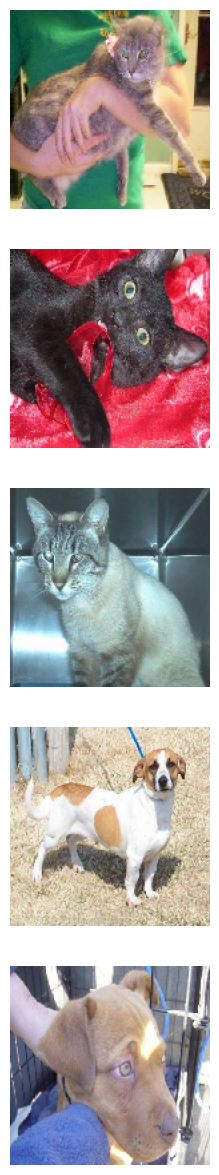

In [ ]:
# 4
# Explore data
# The plotImages function will be used a few times to plot images.
# It takes an array of images and a probabilities list, although the probabilities list is optional.
# This code is given to you. If you created the train_data_gen variable correctly, then running
# the cell below will plot five random training images.
#"Plotting images" refers to the process of visually displaying a set of images in a structured or organized manner
def plotImages(images_arr, probabilities = False):
    fig, axes = plt.subplots(len(images_arr), 1, figsize=(5,len(images_arr) * 3))
    if probabilities is False:
      # This line creates a new matplotlib figure and a set of subplots:
      # len(images_arr): The number of rows is equal to the number of images.
      # 1: Only one column of images/subplots.
      # figsize: Sets the width of the figure to 5 units and the height to three times the number of images.
      for img, ax in zip( images_arr, axes):
          # This line begins a loop where img is each individual image
          #from images_arr and ax is its corresponding plotting axis from the axes array.
          ax.imshow(img)
          ax.axis('off')
          #This turns off the axis labels and ticks, giving a clean image display without any numbers around it.
    else:
      for img, probability, ax in zip( images_arr, probabilities, axes):
          ax.imshow(img)
          ax.axis('off')
          if probability > 0.5:
              ax.set_title("%.2f" % (probability*100) + "% dog")
          else:
              ax.set_title("%.2f" % ((1-probability)*100) + "% cat")
    plt.show()

sample_training_images, _ = next(train_data_gen)
plotImages(sample_training_images[:5])


In [ ]:
# 5
#Since there are a small number of training examples, there is a risk of overfitting.
# One way to fix this problem is by creating more training data from existing training examples by using
# random transformations.
# Add 4-6 random transformations as arguments to ImageDataGenerator. Make sure to rescale the same as before.
train_image_generator = ImageDataGenerator(
                            rescale=1./255,
                            horizontal_flip=True,
                            rotation_range=20,
                            zoom_range=0.15,
                            width_shift_range=0.2,
                            height_shift_range=0.2,
                            shear_range=0.15,
                            fill_mode="nearest")


Found 2000 images belonging to 2 classes.


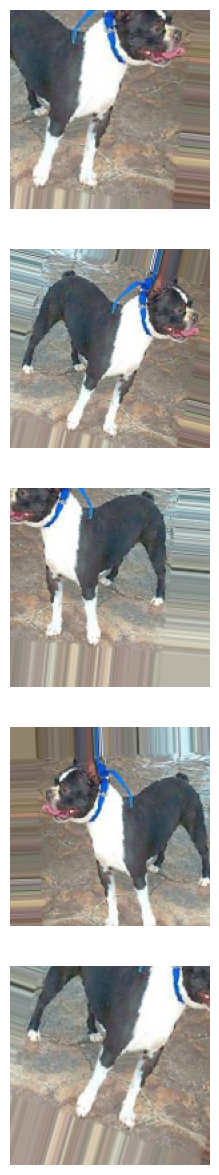

In [ ]:
# 6
# You don't have to do anything for this cell. train_data_gen is created just like before but with the new train_image_generator.
# Then, a single image is plotted five different times using different variations.
train_data_gen = train_image_generator.flow_from_directory(batch_size=batch_size,
                                                     directory=train_dir,
                                                     target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                     class_mode='binary')
# train_data_gen[0][0][0] refers to the first image in the first batch.
# The list comprehension will produce a list of 5 identical images
# because it is repeatedly fetching the same image (train_data_gen[0][0][0]) 5 times.
augmented_images = [train_data_gen[0][0][0] for i in range(5)]

plotImages(augmented_images)

In [ ]:
# 7
# In this cell, create a model for the neural network that outputs class probabilities.
# It should use the Keras Sequential model.
# It will probably involve a stack of Conv2D and MaxPooling2D layers
# and then a fully connected layer on top that is activated by a ReLU activation function.
# Compile the model passing the arguments to set the optimizer and loss. Also pass in metrics=['accuracy'] to view training and validation accuracy for each training epoch.

model = Sequential()
# Convolutions
model.add(Input(shape=(IMG_HEIGHT, IMG_WIDTH,3)))
model.add(Conv2D(32, (3,3)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, (3,3)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(128, (3,3)))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Dense layers
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# Optimizer
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 74, 74, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 36, 36, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 17, 17, 128)       0

In [ ]:
# 8
# Use the fit method on your model to train the network.
# Make sure to pass in arguments for x, steps_per_epoch, epochs, validation_data, and validation_steps.
history = history = model.fit(
            train_data_gen, #steps_per_epoch=train_steps,
            validation_data=val_data_gen, #validation_steps=val_steps,
            epochs=epochs)

Epoch 1/15
16/16 [==============================] - 129s 8s/step - loss: 1.6749 - accuracy: 0.5135 - val_loss: 0.7274 - val_accuracy: 0.5000
Epoch 2/15
16/16 [==============================] - 128s 8s/step - loss: 0.6835 - accuracy: 0.5405 - val_loss: 0.6946 - val_accuracy: 0.5600
Epoch 3/15
16/16 [==============================] - 127s 8s/step - loss: 0.6774 - accuracy: 0.5670 - val_loss: 0.6500 - val_accuracy: 0.5840
Epoch 4/15
16/16 [==============================] - 122s 8s/step - loss: 0.6675 - accuracy: 0.5670 - val_loss: 0.6397 - val_accuracy: 0.6320
Epoch 5/15
16/16 [==============================] - 127s 8s/step - loss: 0.6587 - accuracy: 0.5775 - val_loss: 0.7224 - val_accuracy: 0.5220
Epoch 6/15
16/16 [==============================] - 128s 8s/step - loss: 0.6668 - accuracy: 0.5735 - val_loss: 0.6486 - val_accuracy: 0.5650
Epoch 7/15
16/16 [==============================] - 128s 8s/step - loss: 0.6572 - accuracy: 0.5775 - val_loss: 0.6425 - val_accuracy: 0.6110
Epoch 8/15
16

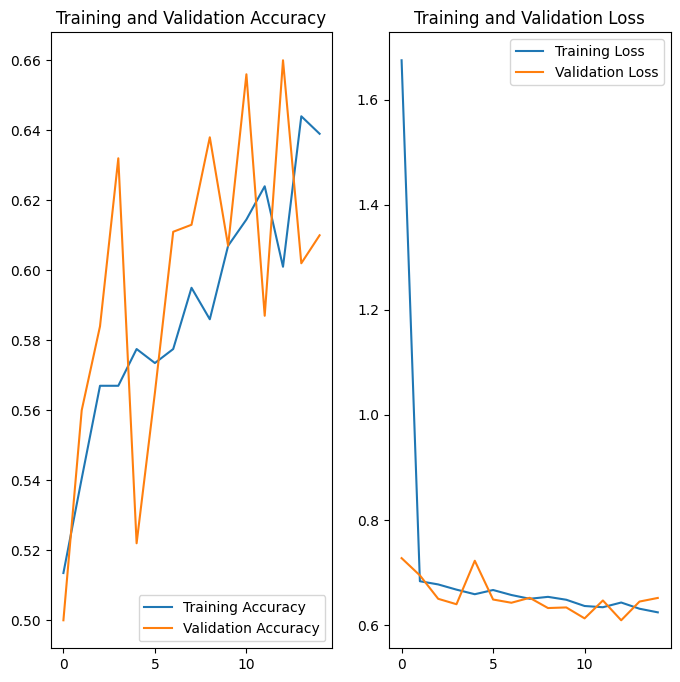

In [ ]:
# 9
# Evaluate
# Run the next cell to visualize the accuracy and loss of the model.
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [ ]:
#10
#Now it is time to use your model to predict whether a brand new image is a cat or a dog.

#In this cell, get the probability that each test image (from test_data_gen) is a dog or a cat. probabilities should be a list of integers.

#Call the plotImages function and pass in the test images and the probabilities corresponding to each test image.

# After you run the cell, you should see all 50 test images with a label showing the percentage of "sure" that the image is a cat or a dog.
# The accuracy will correspond to the accuracy shown in the graph above (after running the previous cell). More training images could lead to a higher accuracy.
probabilities = model.predict(test_data_gen).flatten()
probabilities

1/1 [==============================] - 1s 783ms/step


array([0.4925374 , 0.2504778 , 0.46953014, 0.9426015 , 0.31781048,
       0.47215727, 0.82090974, 0.3120611 , 0.3407512 , 0.9261888 ,
       0.68344694, 0.6543572 , 0.43658763, 0.27658254, 0.55303824,
       0.7314968 , 0.6675513 , 0.87184614, 0.5864809 , 0.56788135,
       0.42142805, 0.83630896, 0.37177864, 0.80392635, 0.7768983 ,
       0.54374206, 0.97428364, 0.38633814, 0.49487752, 0.4627072 ,
       0.6724584 , 0.46176207, 0.76799446, 0.9999985 , 0.5191915 ,
       0.6187651 , 0.99205405, 0.804916  , 0.5864809 , 0.5733972 ,
       0.44889474, 0.50074124, 0.9280708 , 0.59916973, 0.6974295 ,
       0.4749916 , 0.5339169 , 0.6739493 , 0.28969377, 0.62967503],
      dtype=float32)

In [ ]:
# 11
answers =  [1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0,
            1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0,
            1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1,
            1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1,
            0, 0, 0, 0, 0, 0]

correct = 0

for probability, answer in zip(probabilities, answers):
  if round(probability) == answer:
    correct +=1

percentage_identified = (correct / len(answers)) * 100

passed_challenge = percentage_identified >= 63

print(f"Your model correctly identified {round(percentage_identified, 2)}% of the images of cats and dogs.")

if passed_challenge:
  print("You passed the challenge!")
else:
  print("You haven't passed yet. Your model should identify at least 63% of the images. Keep trying. You will get it!")

Your model correctly identified 64.0% of the images of cats and dogs.
You passed the challenge!
